### Phys 629: Statistical Tools for Physics Research
***Anuradha Gupta***

# Homework 7
### Due: Friday, Oct 20 at 11:59 pm CT

## Problem 1

This week's problem is worth 40 points. This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw7_data.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

import scipy.stats
from scipy.stats import norm
from scipy.stats import uniform
from scipy import optimize
import pandas as pd 

In [2]:
data = np.load('../../homeworks/hw_data/hw7_data.npy')
df = pd.DataFrame(data, columns = ['x', 'unc'])

# df_s = df.sort_values(by=['x'], axis=0)
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(df_s)

      x   unc
8  3.78  1.00
6  3.93  1.00
1  4.00  1.94
0  4.36  2.24
2  4.87  1.39
3  5.64  2.55
9  5.84  1.00
5  5.92  1.38
4  6.14  1.69
7  6.58  1.60


In [3]:
x = data[:,0] #Measurements
unc = data[:,1] #Uncertainties

Sample mean = 4.942118214425304, Standard error on mean = 0.43024334605205083


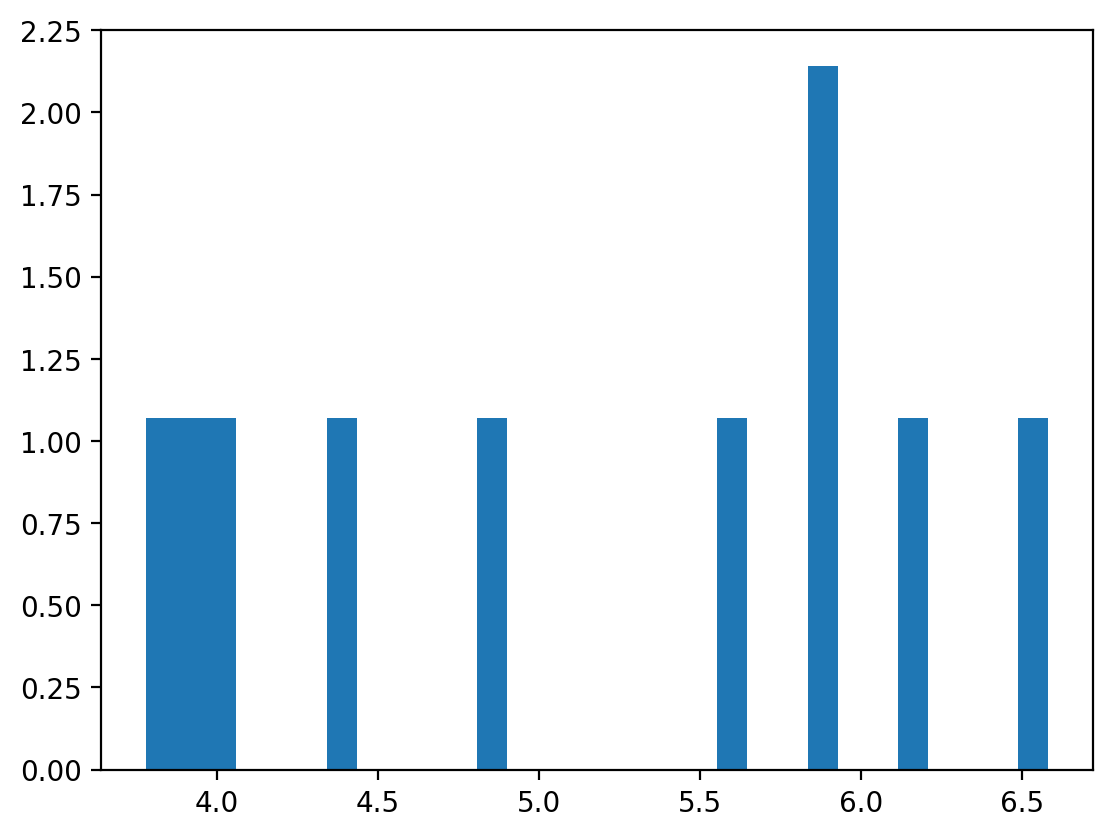

In [4]:
#1
#Sample mean, xbar and std dev, S

N = data.shape[0]

def hetero_mean(x, sigma):
    num = sum(x/sigma**2)
    den = sum(1/sigma**2)
    
    return num/den

def hetero_std(sigma):
    return (sum(1/sigma**2))**(-1/2)



xbar = hetero_mean(x, unc)
sigma_xbar = hetero_std(unc)

print(f'Sample mean = {xbar}, Standard error on mean = {sigma_xbar}')

px, bins, _ = plt.hist(x, 30, density=True);

In [ ]:
#2
#lnL =  